# Data Loading and Preprocessing

In [5]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten, Input
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# data augmentation and normalization
data_gen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

# loading training, validation, and testing datasets
train_data = data_gen.flow_from_directory(
    'data/train',
    target_size=(224, 224),  
    batch_size=64,
    subset='training'
)

val_data = data_gen.flow_from_directory(
    'data/val',
    target_size=(224, 224),
    batch_size=64,
    subset='validation'
)

test_data = data_gen.flow_from_directory(
    'data/test',
    target_size=(224, 224),
    batch_size=64
)

Found 634 images belonging to 2 classes.
Found 19 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


# Model Architecture

In [ ]:
base_model = VGG16(weights='imagenet', include_top=False, input_tensor=Input(shape=(224, 224, 3)))

# freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

# add custom layers on top of the base model
x = base_model.output
x = Flatten()(x)  # flatten the output
x = Dense(1024, activation='relu')(x)  # fully connected layer
x = Dense(512, activation='relu')(x)  # another fully connected layer
predictions = Dense(2, activation='softmax')(x)  # binary classification layer

# create the final model
model = Model(inputs=base_model.input, outputs=predictions)
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │    25,691,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │         1,026 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 40,931,650 (156.14 MB)

 Trainable params: 26,216,962 (100.01 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

# Compiling and Training

In [ ]:
# compile model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# train model
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=20
)
model.save("modelTRANSFER.keras")

/Users/Skele/Documents/Documents - Tushar's MacBook Pro/I320D Applied ML/PROJ/Jivianne/.venv/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20


/Users/Skele/Documents/Documents - Tushar's MacBook Pro/I320D Applied ML/PROJ/Jivianne/.venv/lib/python3.10/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(None, 224, 224, 3))
  warnings.warn(msg)


10/10 ━━━━━━━━━━━━━━━━━━━━ 42s 4s/step - accuracy: 0.5291 - loss: 4.9648 - val_accuracy: 0.5789 - val_loss: 0.7828
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 41s 4s/step - accuracy: 0.6991 - loss: 0.6613 - val_accuracy: 0.4737 - val_loss: 2.3172
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 44s 4s/step - accuracy: 0.7178 - loss: 0.6011 - val_accuracy: 0.6842 - val_loss: 0.9859
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 42s 4s/step - accuracy: 0.8639 - loss: 0.2933 - val_accuracy: 0.3684 - val_loss: 1.0663
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 42s 4s/step - accuracy: 0.8835 - loss: 0.2719 - val_accuracy: 0.5263 - val_loss: 1.6822
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 44s 4s/step - accuracy: 0.8869 - loss: 0.2494 - val_accuracy: 0.5789 - val_loss: 1.1613
Epoch 7/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 43s 4s/step - accuracy: 0.9352 - loss: 0.1675 - val_accuracy: 0.5263 - val_loss: 1.8778
Epoch 8/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 43s 4s/step - accuracy: 0.9529 - loss: 0.1226 - val_accuracy: 0.5789 - val_loss: 1.6481
Epo

In [3]:
# USE IF NEEDED
from tensorflow.keras.models import load_model
model = load_model("modelTRANSFER.keras")

In [7]:
# model accuracy on test data
test_loss, test_accuracy = model.evaluate(test_data)
print(f"Test Accuracy: {test_accuracy:.4f}")

/Users/Skele/Documents/Documents - Tushar's MacBook Pro/I320D Applied ML/PROJ/Jivianne/.venv/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2/2 ━━━━━━━━━━━━━━━━━━━━ 7s 3s/step - accuracy: 0.8969 - loss: 0.3722
Test Accuracy: 0.9000


In [ ]:
#OTHER STATS
from sklearn.metrics import classification_report
import numpy as np

# Get predictions and true labels from the test dataset
true_classes = []
predicted_classes = []

# Iterate over the test_data generator
for _ in range(len(test_data)):
    images, labels = next(test_data)  # Get a batch of data

    # True labels
    true_classes.extend(np.argmax(labels, axis=1))  # Convert one-hot encoded labels to class indices

    # Predictions
    predictions = model.predict(images)
    predicted_classes.extend(np.argmax(predictions, axis=1))  # Convert probabilities to class indices

# Generate and display the classification report
report = classification_report(true_classes, predicted_classes, target_names=["Class 0", "Class 1"])
print(report)

2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 344ms/step
              precision    recall  f1-score   support

     Class 0       0.88      0.91      0.90        47
     Class 1       0.92      0.89      0.90        53

    accuracy                           0.90       100
   macro avg       0.90      0.90      0.90       100
weighted avg       0.90      0.90      0.90       100



2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step


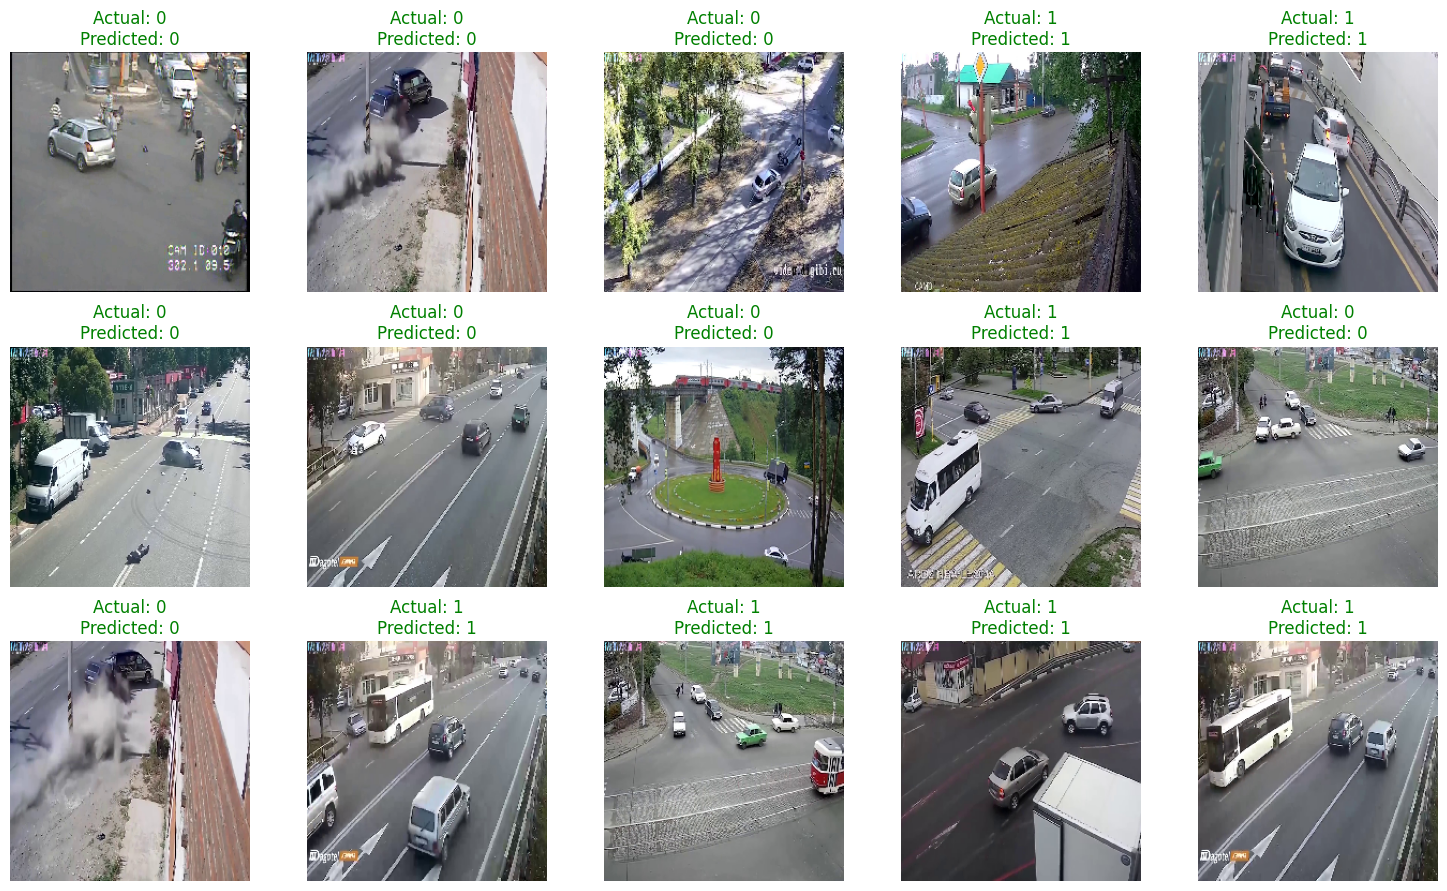

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Get a batch of test data (images and labels)
images, labels = next(test_data)

# Generate predictions for the batch
predictions = model.predict(images)

# Decode actual labels and predictions
actual_classes = np.argmax(labels, axis=1)  # Convert one-hot encoded labels to class indices
predicted_classes = np.argmax(predictions, axis=1)  # Convert probabilities to class indices

# Plot a few images along with their actual and predicted labels
num_images = 15  # Number of images to display

# Dynamically calculate figsize
rows = (num_images // 5) + (num_images % 5 > 0)  # 5 images per row
figsize = (15, rows * 3)  # Width fixed, height adjusts with rows

plt.figure(figsize=figsize)  # Dynamically set the figure size

for i in range(num_images):
    plt.subplot(rows, 5, i + 1)  # 5 images per row
    plt.imshow(images[i])  # Display the image
    plt.axis('off')  # Turn off axis for better visuals
    plt.title(
        f"Actual: {actual_classes[i]}\nPredicted: {predicted_classes[i]}",
        color="green" if actual_classes[i] == predicted_classes[i] else "red"  # Color-code correct/incorrect
    )

plt.tight_layout()
plt.show()